In [1]:
# Load all CSV files
import pandas as pd
import os

data_folder = r"C:\Users\admin\Downloads\Hedging-of-Financial-Derivatives-main\Hedging-of-Financial-Derivatives-main"

def get_all_csv_files(directory):
    csv_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

csv_files = get_all_csv_files(data_folder)
data = {}
for file_path in csv_files:
    file_name = os.path.basename(file_path)
    try:
        data[file_name] = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

if "AAPL.csv" in data:
    print(data["AAPL.csv"].head())
else:
    print("AAPL.csv not found in the loaded data.")

         Date  Open  High   Low  Close(t)     Volume      SD20  Upper_Band  \
0  2005-10-17  6.66  6.69  6.50      6.60  154208600  0.169237    6.827473   
1  2005-10-18  6.57  6.66  6.44      6.45  152397000  0.168339    6.819677   
2  2005-10-19  6.43  6.78  6.32      6.78  252170800  0.180306    6.861112   
3  2005-10-20  6.72  6.97  6.71      6.93  339440500  0.202674    6.931847   
4  2005-10-21  7.02  7.03  6.83      6.87  199181500  0.216680    6.974860   

   Lower_Band  S_Close(t-1)  ...  QQQ_MA10  QQQ_MA20  QQQ_MA50  SnP_Close  \
0    6.150527          6.67  ...    33.692   33.9970   34.2690    1190.10   
1    6.146323          6.60  ...    33.570   33.9525   34.2466    1178.14   
2    6.139888          6.45  ...    33.562   33.9600   34.2330    1195.76   
3    6.121153          6.78  ...    33.567   33.9455   34.2190    1177.80   
4    6.108140          6.93  ...    33.586   33.9365   34.2034    1179.59   

   SnP(t-1))  SnP(t-5)  DJIA_Close  DJIA(t-1))  DJIA(t-5)  Close_for

In [2]:
#calculate the annual growth rate
import pandas as pd
import os

data_folder = r"C:\Users\admin\Downloads\Hedging-of-Financial-Derivatives-main\Hedging-of-Financial-Derivatives-main"

def get_all_csv_files(directory):
    csv_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

csv_files = get_all_csv_files(data_folder)
data = {}
for file_path in csv_files:
    file_name = os.path.basename(file_path)
    try:
        data[file_name] = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

def calculate_growth_rate(df, date_column, value_column):
    print(f"Columns in DataFrame: {df.columns}")
    
    df.columns = df.columns.str.strip()

    if date_column not in df.columns or value_column not in df.columns:
        raise ValueError(f"Column {date_column} or {value_column} not found in DataFrame")

    df[date_column] = pd.to_datetime(df[date_column])
    df = df.set_index(date_column)
    df = df.resample('Y').last()
    df['Growth'] = df[value_column].pct_change().fillna(0)
    return df

try:
    aapl_growth = calculate_growth_rate(data["AAPL.csv"], 'Date', 'Close(t)')
    nifty_growth = calculate_growth_rate(data["NIFTY__50.csv"], 'Date', 'Close')
    print(aapl_growth.head())
    print(nifty_growth.head())
except ValueError as e:
    print(e)
except KeyError as e:
    print(f"KeyError: {e}")

Columns in DataFrame: Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')
Columns in DataFrame: Index(['Index Name', 'Date', 'Open', 'High', 'Low', 'Close'], dtype='object')
             Open   High    Low  Clos

Columns in DataFrame: Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')
Columns in DataFrame: Index(['Index Name', 'Date', 'Open', 'High', 'Low', 'Close'], dtype='object')
             Open   High    Low  Clos

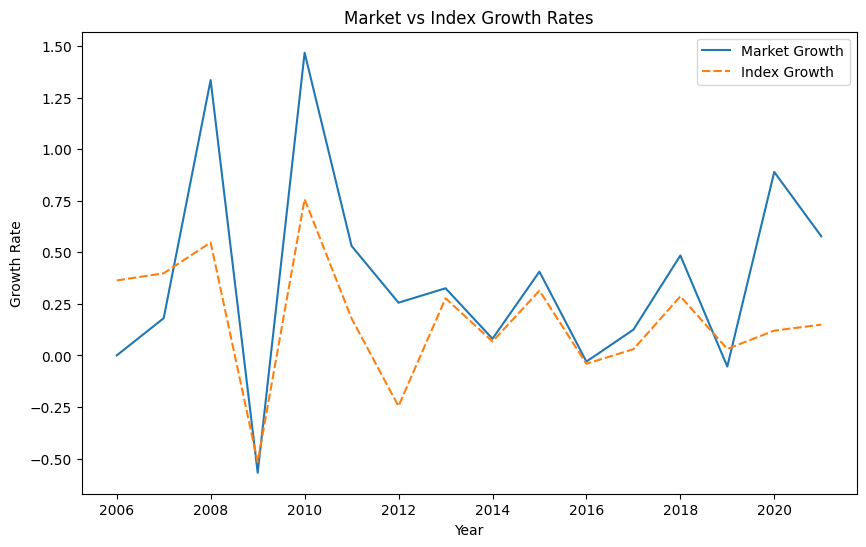

               Market Growth  Index Growth
Market Growth       1.000000      0.757508
Index Growth        0.757508      1.000000


In [3]:
# Calculate growth rates for a selected stock and index
import matplotlib.pyplot as plt
import seaborn as sns

try:
    aapl_growth = calculate_growth_rate(data["AAPL.csv"], 'Date', 'Close(t)')
    nifty_growth = calculate_growth_rate(data["NIFTY__50.csv"], 'Date', 'Close')
    print(aapl_growth.head())
    print(nifty_growth.head())
except ValueError as e:
    print(e)
except KeyError as e:
    print(f"KeyError: {e}")

combined_growth = pd.DataFrame({
    'Market Growth': aapl_growth['Growth'],
    'Index Growth': nifty_growth['Growth']
}).dropna()

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_growth)
plt.title("Market vs Index Growth Rates")
plt.xlabel("Year")
plt.ylabel("Growth Rate")
plt.legend(labels=["Market Growth", "Index Growth"])
plt.show()

correlation = combined_growth.corr()
print(correlation)

             Open   High    Low  Close(t)     Volume      SD20  Upper_Band  \
Date                                                                         
2005-12-31   8.75   8.94   8.68      8.87  156065700  0.154418    9.330337   
2006-12-31  10.36  10.54  10.29     10.47  269107300  0.420204   11.513908   
2007-12-31  24.63  24.75  24.41     24.45  134833300  0.815095   25.147190   
2008-12-31  10.61  10.83  10.54     10.54  151885300  0.651763   12.614025   
2009-12-31  26.31  26.34  25.99     26.01   88102700  0.906755   26.404010   

            Lower_Band  S_Close(t-1)  S_Close(t-2)  ...  QQQ_MA20  QQQ_MA50  \
Date                                                ...                       
2005-12-31    8.712663          8.82          9.08  ...   36.5935   35.9132   
2006-12-31    9.833092          9.98         10.06  ...   38.7690   38.4380   
2007-12-31   21.886810         24.67         24.51  ...   45.6535   45.9334   
2008-12-31   10.006975         10.65         10.69  ...   

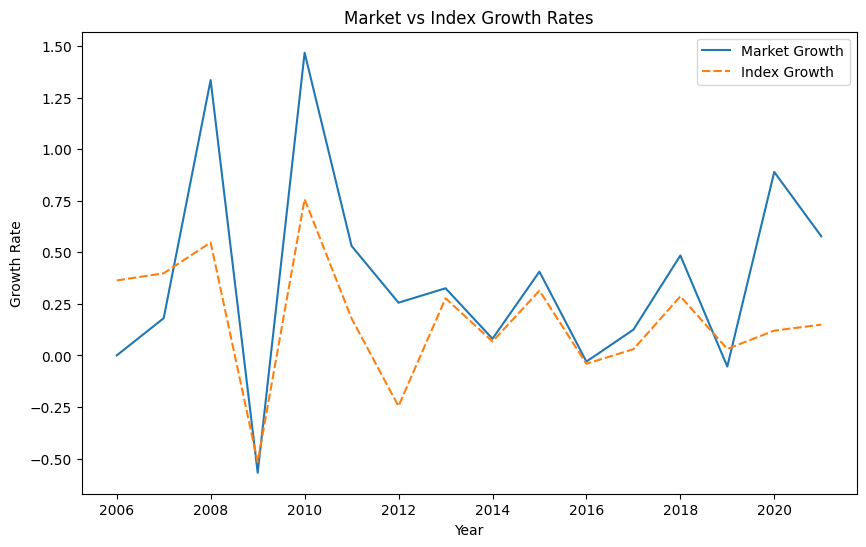

               Market Growth  Index Growth
Market Growth       1.000000      0.757508
Index Growth        0.757508      1.000000
Cointegration test p-value: 1.0
            AAPL Close  NIFTY Close   Z-Score   Long  Short
Date                                                       
2005-10-17        6.60      2485.15  1.652447  False   True
2005-10-18        6.45      2468.20  1.658989  False   True
2005-10-19        6.78      2412.45  1.680827  False   True
2005-10-20        6.93      2395.45  1.687506  False   True
2005-10-21        6.87      2443.75  1.668674  False   True


In [4]:
# Calculate growth rates for a selected stock and index

import numpy as np
from statsmodels.tsa.stattools import coint
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

data_folder = r"C:\Users\admin\Downloads\Hedging-of-Financial-Derivatives-main\Hedging-of-Financial-Derivatives-main"

def get_all_csv_files(directory):
    csv_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

csv_files = get_all_csv_files(data_folder)
data = {}
for file_path in csv_files:
    file_name = os.path.basename(file_path)
    try:
        data[file_name] = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

def calculate_growth_rate(df, date_column, value_column):
    df.columns = df.columns.str.strip()

    if date_column not in df.columns or value_column not in df.columns:
        raise ValueError(f"Column {date_column} or {value_column} not found in DataFrame")

    df[date_column] = pd.to_datetime(df[date_column])
    df = df.set_index(date_column)
    df = df.resample('Y').last()  
    df['Growth'] = df[value_column].pct_change().fillna(0)
    return df

try:
    aapl_growth = calculate_growth_rate(data["AAPL.csv"], 'Date', 'Close(t)')
    nifty_growth = calculate_growth_rate(data["NIFTY__50.csv"], 'Date', 'Close')
    print(aapl_growth.head())
    print(nifty_growth.head())
except ValueError as e:
    print(e)
except KeyError as e:
    print(f"KeyError: {e}")

combined_growth = pd.DataFrame({
    'Market Growth': aapl_growth['Growth'],
    'Index Growth': nifty_growth['Growth']
}).dropna()

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_growth)
plt.title("Market vs Index Growth Rates")
plt.xlabel("Year")
plt.ylabel("Growth Rate")
plt.legend(labels=["Market Growth", "Index Growth"])
plt.show()

correlation = combined_growth.corr()
print(correlation)

aapl_close = data["AAPL.csv"][['Date', 'Close(t)']].rename(columns={'Close(t)': 'AAPL Close'})
nifty_close = data["NIFTY__50.csv"][['Date', 'Close']].rename(columns={'Close': 'NIFTY Close'})

aapl_close['Date'] = pd.to_datetime(aapl_close['Date'])
nifty_close['Date'] = pd.to_datetime(nifty_close['Date'])

merged_data = pd.merge(aapl_close, nifty_close, on='Date').set_index('Date')

score, p_value, _ = coint(merged_data['AAPL Close'], merged_data['NIFTY Close'])
print(f"Cointegration test p-value: {p_value}")

def calculate_zscore(spread):
    return (spread - spread.mean()) / spread.std()

spread = merged_data['AAPL Close'] - merged_data['NIFTY Close']
zscore = calculate_zscore(spread)

merged_data['Z-Score'] = zscore
merged_data['Long'] = merged_data['Z-Score'] < -1
merged_data['Short'] = merged_data['Z-Score'] > 1

print(merged_data.head())

In [5]:
# Delta hedging using options (Black-Scholes model)
from scipy.stats import norm

def black_scholes_greeks(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# Parameters
S = 100  # Stock price
K = 100  # Strike price
T = 1    # Time to maturity (1 year)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility

delta = black_scholes_greeks(S, K, T, r, sigma)
print(f'Delta: {delta}')

Delta: 0.6368306511756191
